<a href="https://colab.research.google.com/github/Tushy12/Fashion_MNIST/blob/main/Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


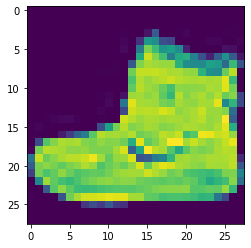

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train[0].max()

255

### Preprocessing

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[0].max()

1.0

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

### Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [ ]:
y_cat_train.shape

(60000, 10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(2,2),input_shape=(28,28,1),
                 activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [ ]:
model.fit(x_train,y_cat_train,epochs=20,callbacks=[early_stop],
          validation_data=(x_test,y_cat_test))

Epoch 1/20
1875/1875 [==============================] - 42s 22ms/step - loss: 0.4263 - accuracy: 0.8494 - val_loss: 0.3570 - val_accuracy: 0.8661
Epoch 2/20
1875/1875 [==============================] - 40s 22ms/step - loss: 0.2876 - accuracy: 0.8970 - val_loss: 0.3043 - val_accuracy: 0.8921
Epoch 3/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2478 - accuracy: 0.9108 - val_loss: 0.2882 - val_accuracy: 0.8983
Epoch 4/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2227 - accuracy: 0.9194 - val_loss: 0.2902 - val_accuracy: 0.9019


In [ ]:
pred = np.argmax(model.predict(x_test), axis=-1)
pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
result = pd.DataFrame(model.history.history)

In [ ]:
result

,loss,accuracy,val_loss,val_accuracy
0,0.426296,0.849400,0.357003,0.8661
1,0.287605,0.897000,0.304332,0.8921
2,0.247768,0.910767,0.288192,0.8983
3,0.222748,0.919433,0.290212,0.9019


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.89      0.81      0.85      1000
           3       0.82      0.96      0.89      1000
           4       0.83      0.88      0.85      1000
           5       0.98      0.97      0.97      1000
           6       0.75      0.73      0.74      1000
           7       0.95      0.96      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



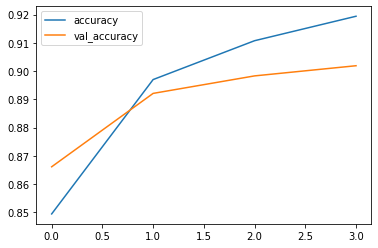

In [ ]:
result[['accuracy','val_accuracy']].plot()

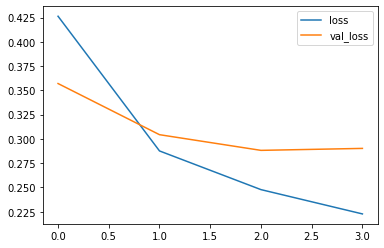

In [ ]:
result[['loss','val_loss']].plot()